In [ ]:
!pip install kaggle

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [9]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/drive/MyDrive/face-mask-dataset (1).zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
!ls

 data   drive   sample_data  'wihout mask.webp'  'with mask.webp'


**Importing the Dependencies**

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1947.jpg', 'with_mask_2733.jpg', 'with_mask_3611.jpg', 'with_mask_1392.jpg', 'with_mask_907.jpg']
['with_mask_1872.jpg', 'with_mask_323.jpg', 'with_mask_159.jpg', 'with_mask_3709.jpg', 'with_mask_1090.jpg']


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2936.jpg', 'without_mask_2717.jpg', 'without_mask_1757.jpg', 'without_mask_3475.jpg', 'without_mask_131.jpg']
['without_mask_1188.jpg', 'without_mask_2271.jpg', 'without_mask_1446.jpg', 'without_mask_1373.jpg', 'without_mask_2330.jpg']


In [14]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [15]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [16]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [18]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

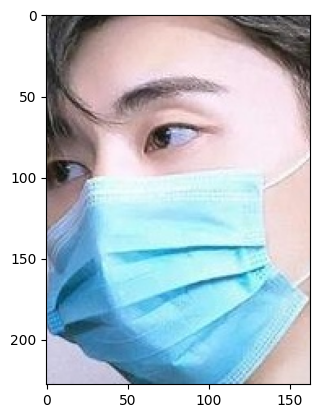

In [19]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

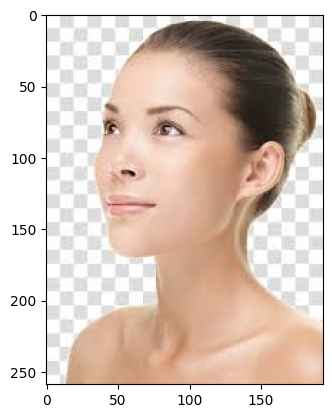

In [20]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [21]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

In [23]:
len(data)

7553

In [24]:
data[0]

array([[[50, 58, 31],
        [47, 56, 34],
        [57, 60, 43],
        ...,
        [32, 33, 27],
        [28, 34, 20],
        [35, 41, 11]],

       [[49, 56, 32],
        [49, 58, 36],
        [58, 62, 39],
        ...,
        [31, 31, 21],
        [30, 37, 25],
        [31, 41, 17]],

       [[50, 57, 36],
        [50, 59, 37],
        [58, 62, 34],
        ...,
        [44, 40, 26],
        [27, 33, 25],
        [18, 30, 12]],

       ...,

       [[64, 74, 39],
        [68, 78, 43],
        [72, 82, 48],
        ...,
        [10,  9,  5],
        [18, 17, 12],
        [23, 22, 17]],

       [[57, 70, 33],
        [60, 71, 39],
        [66, 74, 48],
        ...,
        [15, 14, 11],
        [15, 13, 11],
        [15, 10,  9]],

       [[53, 68, 30],
        [54, 66, 38],
        [59, 65, 44],
        ...,
        [18, 17, 16],
        [17, 13, 12],
        [18, 11, 11]]], dtype=uint8)

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(128, 128, 3)

In [27]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [28]:
type(X)

numpy.ndarray

In [29]:
type(Y)

numpy.ndarray

In [30]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [31]:

print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [34]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [35]:
X_train[0]

array([[[199, 200, 205],
        [199, 200, 205],
        [200, 201, 206],
        ...,
        [227, 234, 244],
        [227, 234, 244],
        [226, 233, 243]],

       [[200, 201, 206],
        [200, 201, 206],
        [201, 202, 207],
        ...,
        [227, 234, 244],
        [227, 234, 244],
        [226, 233, 243]],

       [[200, 201, 206],
        [201, 202, 207],
        [202, 203, 208],
        ...,
        [227, 234, 244],
        [227, 234, 244],
        [227, 234, 244]],

       ...,

       [[198, 204, 218],
        [153, 160, 171],
        [ 15,  20,  26],
        ...,
        [222, 231, 247],
        [215, 226, 244],
        [219, 229, 247]],

       [[197, 203, 216],
        [ 95, 101, 112],
        [  3,   7,  13],
        ...,
        [212, 221, 238],
        [218, 229, 247],
        [220, 230, 247]],

       [[185, 193, 203],
        [ 40,  44,  52],
        [  5,   9,  13],
        ...,
        [188, 197, 212],
        [218, 229, 246],
        [217, 228, 245]]

In [36]:
X_train_scaled[0]

array([[[0.78039216, 0.78431373, 0.80392157],
        [0.78039216, 0.78431373, 0.80392157],
        [0.78431373, 0.78823529, 0.80784314],
        ...,
        [0.89019608, 0.91764706, 0.95686275],
        [0.89019608, 0.91764706, 0.95686275],
        [0.88627451, 0.91372549, 0.95294118]],

       [[0.78431373, 0.78823529, 0.80784314],
        [0.78431373, 0.78823529, 0.80784314],
        [0.78823529, 0.79215686, 0.81176471],
        ...,
        [0.89019608, 0.91764706, 0.95686275],
        [0.89019608, 0.91764706, 0.95686275],
        [0.88627451, 0.91372549, 0.95294118]],

       [[0.78431373, 0.78823529, 0.80784314],
        [0.78823529, 0.79215686, 0.81176471],
        [0.79215686, 0.79607843, 0.81568627],
        ...,
        [0.89019608, 0.91764706, 0.95686275],
        [0.89019608, 0.91764706, 0.95686275],
        [0.89019608, 0.91764706, 0.95686275]],

       ...,

       [[0.77647059, 0.8       , 0.85490196],
        [0.6       , 0.62745098, 0.67058824],
        [0.05882353, 0

**Building a Convolutional Neural Networks (CNN)**

In [37]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.models import Sequential


In [38]:
num_of_classes = 2

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(num_of_classes, activation='sigmoid'))

In [39]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [40]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 22ms/step - loss: 0.4764 - acc: 0.8038 - val_loss: 0.2620 - val_acc: 0.8810
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2989 - acc: 0.8814 - val_loss: 0.2599 - val_acc: 0.8959
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2442 - acc: 0.8992 - val_loss: 0.2132 - val_acc: 0.9058
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2090 - acc: 0.9147 - val_loss: 0.2245 - val_acc: 0.9091
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1828 - acc: 0.9325 - val_loss: 0.1965 - val_acc: 0.9240


**Model Evaluation**

In [41]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2382 - acc: 0.9107
Test Accuracy = 0.9106552004814148


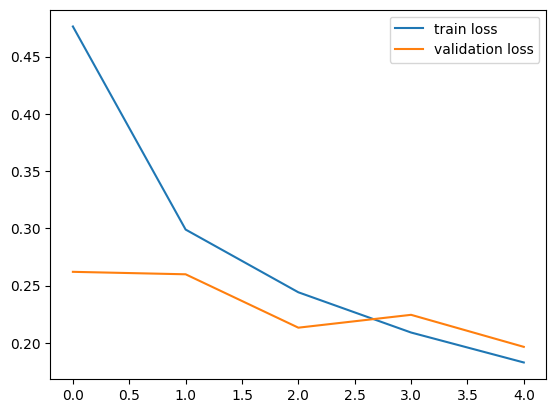

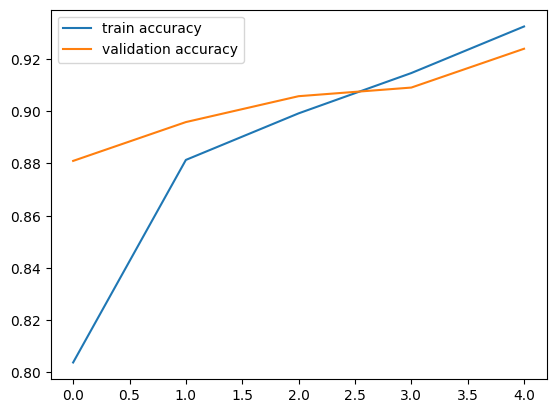

In [42]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/wihout mask.webp


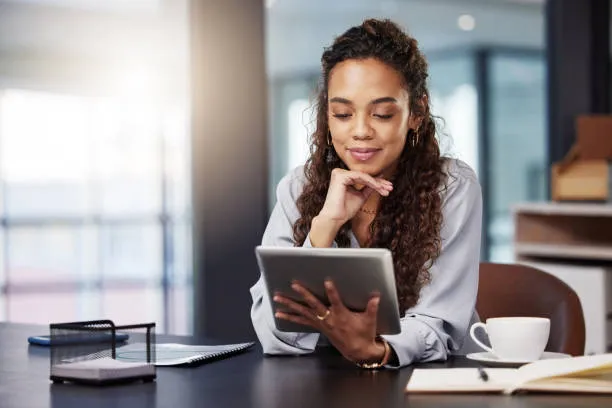

1/1 [==============================] - 0s 175ms/step
[[0.5201941  0.48698902]]
0
The person in the image is not wearing a mask


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)
#argmax returns 1 if the second value(without mask) has higher probability and
#0 if the first value(with mask) has higher probability

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')

Path of the image to be predicted: /content/with mask.webp


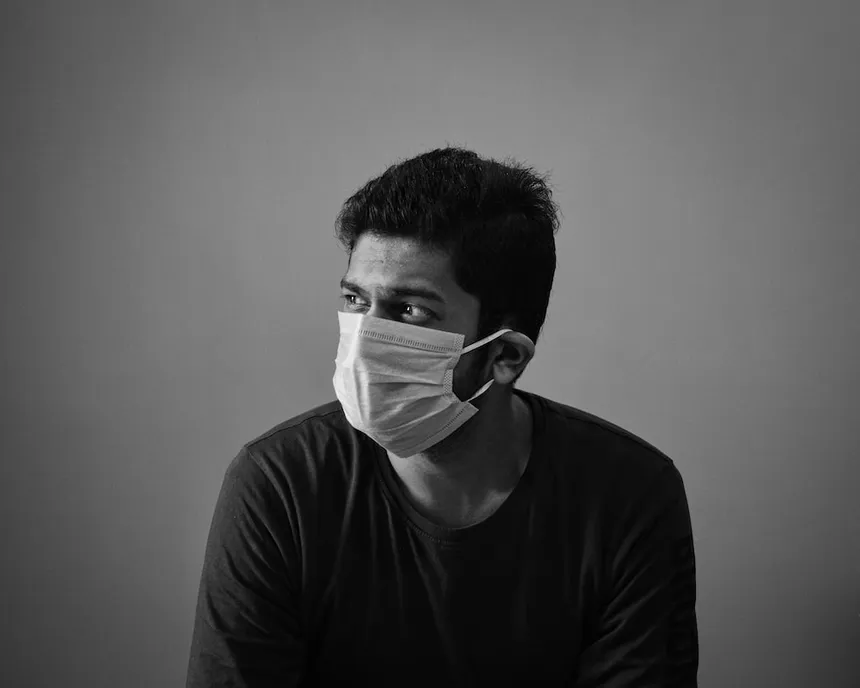

1/1 [==============================] - 0s 28ms/step
[[0.38428557 0.7893531 ]]
1
The person in the image is wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')

In [ ]:
import pickle

In [ ]:
#wb- write in binary
#filename is the name of the file to be created
#saving the model crerated
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
#loading the saved model.
loaded_model=pickle.load(open('trained_model.sav','rb'))